# ***WaZP catalogs notebook***

Author: Gabriel Luan Souza de Oliveira.

Last update: 07/03/2022.

## ***Imported modules***

In [139]:
%load_ext autoreload
%autoreload 2

#import numpy as np
#import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from astropy.table import Table
#import healpy as hp
#import copy

#from gavodb import DBManager
#import sqlalchemy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ***Loading data***

In [140]:
clusters_table_path = '/archive/user/aguena/cats/dc2/cosmoDC2_v1.1.4/extragal/wazp/6563/wazp_cluster.fits'
members_table_path = '/archive/user/aguena/cats/dc2/cosmoDC2_v1.1.4/extragal/wazp/6563/wazp_membership.fits'
clusters_table = Table.read(clusters_table_path)
members_table = Table.read(members_table_path)

## ***Inspecting data***

In [141]:
def inspect_data(clusters_table,members_table):
    
    clusters_n = len(clusters_table)
    members_n = len(members_table)
    print('Número de clusters: ', clusters_n, '\n')
    print('Número de members: ', members_n, '\n')
    
    cluster_keys = clusters_table.keys()
    members_keys = members_table.keys()
    
    print('Keywords de clusters: \n', cluster_keys, '\n')
    print('Keywords de members: \n', members_keys, '\n')
    
    print(clusters_table[0:10])
    print(members_table[0:10])
inspect_data(clusters_table,members_table)

Número de clusters:  40389 

Número de members:  850995 

Keywords de clusters: 
 ['SeqNr', 'DETECTION_TILE', 'IZ_INIT', 'IZ_FINAL', 'PEAK_ID_TILE_IZ', 'ID_IN_TILE', 'RA', 'DEC', 'zp', 'zp_median', 'Z_INIT', 'ZMIN_CL', 'ZMAX_CL', 'ZMIN_95_CL', 'ZMAX_95_CL', 'MSTAR_CL', 'XPEAK', 'YPEAK', 'RADIUS_ISO_MPC', 'RADIUS_SADDLE_MPC', 'MAXWAVE', 'FLUX_WAVE', 'FLAG_MERGE', 'SIGMA_DZ_INIT', 'SIGMA_DZ_EFF', 'FLAG_ZP', 'NGAL_FOR_ZP', 'FLAG_IZ', 'GLOBAL_NBKG_ZM', 'GLOBAL_LBKG_ZM', 'SIG_NBKG_ZM', 'SIG_LBKG_ZM', 'LOCAL_NBKG_ZM', 'LOCAL_LBKG_ZM', 'AREA_LOCAL_BKG', 'MASKED_FRAC_1MPC', 'MASKED_FRAC_05MPC', 'MASKED_FRAC_03MPC', 'SNR', 'SNR_NGALS', 'SNR_LGALS', 'CONTRAST_NGALS', 'CONTRAST_LGALS', 'DMAG_CORE', 'DMAG_BCG', 'DIST_BCG', 'NGALS_TEST', 'NGALS_CEN', 'LGALS_CEN', 'LOCAL_NBKG', 'LOCAL_LBKG', 'GLOBAL_NBKG', 'GLOBAL_LBKG', 'SIG_NBKG', 'SIG_LBKG', 'OUT_OF_CYL', 'CYL_NSL', 'PARENT_CYL_NSL', 'ZMIN_CYL', 'ZMAX_CYL', 'IZ_MIN_CYL', 'IZ_MAX_CYL', 'CONTRAST_CYL', 'NMAX_CYL', 'KING_Rc', 'KING_D0', 'KING_CHI2',

In [142]:
def inspect_columns(table, columns):
    print(table[columns])
    return table[columns]
#inspect_columns(clusters_table, ['SeqNr', 'ID'])
#inspect_columns(members_table, ['SeqNr', 'ID_CLUSTER'])

## ***Selections***

### Ngals selection

In [143]:
clusters_mask = clusters_table['NGALS'] >= 200
clusters_table_reduced = clusters_table[clusters_mask]

members_mask = np.isin(members_table['ID_CLUSTER'],clusters_table_reduced['ID'])
members_table_reduced = members_table[members_mask]

print('Number of NGALS>200 clusters: ', len(clusters_table_reduced))
print('Number of members associated to NGALS>200 clusters: ', len(members_table_reduced))

Number of NGALS>200 clusters:  6
Number of members associated to NGALS>200 clusters:  2211


### Color choice

In [151]:
bands = ['u','g','r','i','z','y','j','h','k']
aux_bands = bands[1:]+bands[:1]
colors_keywords = [i+'-'+j for i,j in zip(bands,aux_bands)]
colors_keywords.pop(-1)

mag_keywords = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y', 'mag_j', 'mag_h', 'mag_k']
aux_mag_keywords = mag_keywords[1:]+mag_keywords[:1]
mag_keywords.pop(-1)
aux_mag_keywords.pop(-1)

for i,j,k in zip(colors_keywords,mag_keywords,aux_mag_keywords):
    members_table_reduced[i] = members_table_reduced[j] - members_table_reduced[k]

#print(members_table_reduced[colors_keywords])
print(members_table_reduced[mag_keywords])

mag_u  mag_g   mag_r   mag_i   mag_z   mag_y  mag_j mag_h
----- ------- ------- ------- ------- ------- ----- -----
 99.0 25.1454 24.5514 23.6175 23.2219 23.1539  99.0  99.0
 99.0 25.8951 23.9754 22.9345 22.1337 21.8149  99.0  99.0
 99.0 24.3553  24.118 23.4587 23.1324 23.0619  99.0  99.0
 99.0 23.7425  23.427 22.7292 22.4265 22.3623  99.0  99.0
 99.0 26.0368 24.6875 23.6143 22.9934  22.813  99.0  99.0
 99.0 24.0333  23.214 22.2664 21.7301 21.6044  99.0  99.0
 99.0 23.6907 22.5816 21.5644 20.9188  20.729  99.0  99.0
 99.0  24.369 23.9595 23.1162 22.6973 22.6512  99.0  99.0
 99.0 25.1866 24.5481 23.5652 23.2049 23.1545  99.0  99.0
 99.0 23.7443 22.9223 21.9737 21.4369  21.311  99.0  99.0
  ...     ...     ...     ...     ...     ...   ...   ...
 99.0 23.7624 23.1521 22.2245 21.8491 21.7418  99.0  99.0
 99.0 23.6237 23.3792 22.6846 22.4468 22.3959  99.0  99.0
 99.0 24.4577 23.9702 23.1331 22.7402  22.635  99.0  99.0
 99.0 25.2352 23.6206 22.5376 21.8387 21.6135  99.0  99.0
 99.0 25.6123 

### CMD

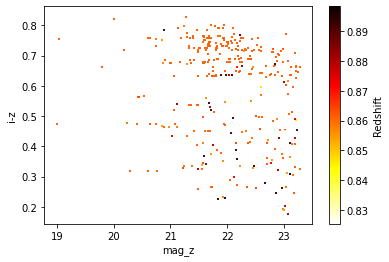

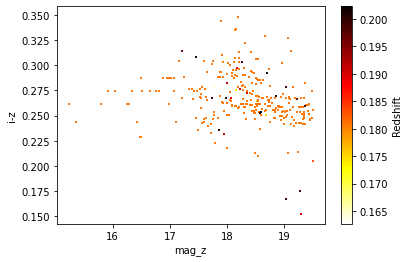

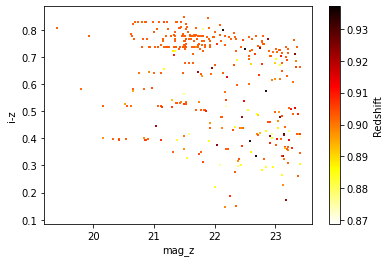

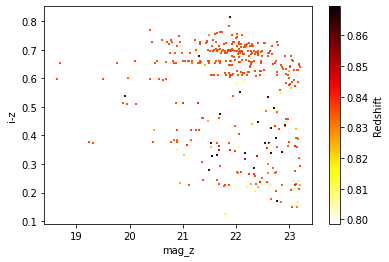

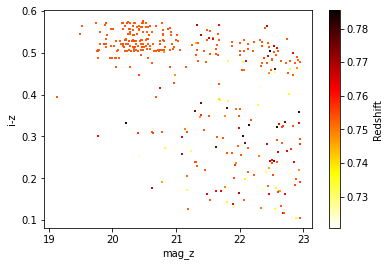

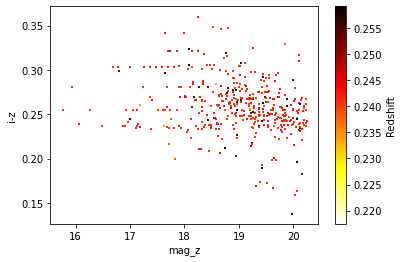

<Figure size 432x288 with 0 Axes>

In [157]:
clusters_dict = {}
for each in clusters_table_reduced['ID']:
    cluster_mask = members_table_reduced['ID_CLUSTER'] == each
    clusters_dict['{}'.format(each)] = members_table_reduced[cluster_mask]
    
#plot

plt.rcParams['axes.facecolor'] = 'white'
band = 3
for cluster_id in clusters_table_reduced['ID'].astype(str):
    color = clusters_dict[cluster_id][colors_keywords[band]]
    mask = color <= 500
    mag = clusters_dict[cluster_id][mag_keywords[band+1]]
    redshift = clusters_dict[cluster_id]['ZP']
    plt.scatter(mag[mask], color[mask], s = 1.0, marker = ',', c = redshift[mask], cmap = cm.hot_r)
    cbar = plt.colorbar()
    cbar.set_label('Redshift')
    plt.xlabel(mag_keywords[band+1])
    plt.ylabel(colors_keywords[band])
    plt.show()
    plt.clf()


## ***Data information***

1) Cluster's ID goes from <b>1</b> to <b>40389</b>.

2) Ngals is different from the number of members related to a specific id_cluster

In [146]:
#1)
print(np.nanmin(inspect_columns(members_table, 'ID_CLUSTER')),
      np.nanmax(inspect_columns(members_table, 'ID_CLUSTER')))

ID_CLUSTER
----------
     15426
     15426
     15426
     15426
     15426
     15426
      8232
      8232
      8232
      8232
       ...
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
Length = 850995 rows
ID_CLUSTER
----------
     15426
     15426
     15426
     15426
     15426
     15426
      8232
      8232
      8232
      8232
       ...
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
     36529
Length = 850995 rows
1 40389


In [147]:
#2)
print(clusters_table_reduced['ID','NGALS'])
for each in clusters_table_reduced['ID']:
    print(each,len(members_table_reduced['ID_CLUSTER'][members_table_reduced['ID_CLUSTER'] == each]))

 ID   NGALS  
--- ---------
  7 211.13347
  6  207.5023
  4  206.5151
  3 264.93726
  2 233.74692
  1 276.63965
7 340
6 301
4 357
3 395
2 376
1 442
